# Predicti

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [2]:
# import all packages required
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [3]:
#Read data into 
data = pd.read_csv(r'C:\Users\bedge\Desktop\NHANES\data_imputed.csv') 


In [4]:
data.head()

,id,persWt,examWt,psu,strata,gender,age,race,education,marital_status,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
0,109266,7825.646112,8154.968193,2,168,2.0,29.0,5.0,5.0,3.0,...,195.000000,113.775145,5.200000,0.720000,1.0,0.0,0.0,0.0,0.0,0.0
1,109267,26379.991724,0.000000,1,156,2.0,21.0,2.0,4.0,3.0,...,185.433015,113.775145,5.868745,4.190001,0.0,0.0,0.0,0.0,0.0,0.0
2,109271,8481.589837,8658.732873,1,167,1.0,49.0,3.0,2.0,3.0,...,147.000000,103.000000,5.600000,28.680000,1.0,0.0,1.0,0.0,1.0,1.0
3,109273,20171.847767,22163.596850,1,155,1.0,36.0,3.0,4.0,3.0,...,164.000000,113.775145,5.100000,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,109274,7227.993241,7801.600218,2,167,1.0,68.0,5.0,4.0,3.0,...,105.000000,154.000000,5.700000,1.600000,1.0,0.0,1.0,1.0,1.0,1.0


In [5]:
data.shape

(9145, 31)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9145.0,117055.421761,4487.868661,109266.000000,113169.000000,117016.000000,120939.000000,124822.000000
persWt,9145.0,26051.956573,30206.051283,1876.867755,9221.175065,15768.646287,29495.831287,338363.600192
examWt,9145.0,26035.978420,32334.886796,0.000000,8441.719475,15546.303391,29929.715143,367555.742979
psu,9145.0,1.541061,0.542872,1.000000,1.000000,2.000000,2.000000,3.000000
strata,9145.0,160.231711,6.957218,149.000000,154.000000,160.000000,166.000000,172.000000
gender,9145.0,1.510224,0.499923,1.000000,1.000000,2.000000,2.000000,2.000000
age,9145.0,51.351558,17.633197,20.000000,36.000000,52.000000,65.000000,80.000000
race,9145.0,3.273920,1.194129,1.000000,3.000000,3.000000,4.000000,5.000000
education,9145.0,3.550793,1.214642,1.000000,3.000000,4.000000,4.000000,9.000000
marital_status,9145.0,1.710662,2.767619,1.000000,1.000000,1.000000,2.000000,99.000000


In [7]:
# since gender is coded as Male=1 , aand Female -2 , it is going to create a problem in analysis- so recoding is necessary

data['gender'] = data['gender'].apply(lambda x: 1 if x == 1 else 0)


In [8]:
data.head()

,id,persWt,examWt,psu,strata,gender,age,race,education,marital_status,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
0,109266,7825.646112,8154.968193,2,168,0,29.0,5.0,5.0,3.0,...,195.000000,113.775145,5.200000,0.720000,1.0,0.0,0.0,0.0,0.0,0.0
1,109267,26379.991724,0.000000,1,156,0,21.0,2.0,4.0,3.0,...,185.433015,113.775145,5.868745,4.190001,0.0,0.0,0.0,0.0,0.0,0.0
2,109271,8481.589837,8658.732873,1,167,1,49.0,3.0,2.0,3.0,...,147.000000,103.000000,5.600000,28.680000,1.0,0.0,1.0,0.0,1.0,1.0
3,109273,20171.847767,22163.596850,1,155,1,36.0,3.0,4.0,3.0,...,164.000000,113.775145,5.100000,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,109274,7227.993241,7801.600218,2,167,1,68.0,5.0,4.0,3.0,...,105.000000,154.000000,5.700000,1.600000,1.0,0.0,1.0,1.0,1.0,1.0


In [9]:
# Separate continuous and categorical variables
continuous_vars = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
                   'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
                   'urine_alb_creat', 'bmi', 'height', 'weight']

categorical_vars = ['food_security', 'monthly_poverty_level_category', 'gender','race',
                    'education','marital_status','health_insurance','Abdominal_obesity',
                    'Triglycerides_high','HDL_low','High_BP','Abnormal_glucose',
                    'metabolic_syndrome']

In [10]:
# Categoricalvariable in data should be in categorical form
#for var in categorical_vars:
#    data[var] = data[var].astype('category')


In [11]:
data.dtypes

id                                  int64
persWt                            float64
examWt                            float64
psu                                 int64
strata                              int64
gender                              int64
age                               float64
race                              float64
education                         float64
marital_status                    float64
monthly_poverty_level_index       float64
monthly_poverty_level_category    float64
health_insurance                  float64
food_security                     float64
weight                            float64
height                            float64
bmi                               float64
waist_circumference               float64
urine_alb_creat                   float64
hdl_cholesterol                   float64
triglycerides                     float64
total_cholesterol                 float64
fasting.glucose                   float64
hba1c                             

In [12]:
data.corr()

,id,persWt,examWt,psu,strata,gender,age,race,education,marital_status,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
id,1.000000,-0.007343,-0.001840,-0.018928,0.003706,0.008113,-0.009218,0.011967,0.009844,-0.000616,...,-0.002904,0.000400,0.002484,0.000454,0.006379,0.015253,0.009691,-0.006240,0.004001,0.005662
persWt,-0.007343,1.000000,0.933987,-0.014869,-0.036966,-0.007082,-0.136223,-0.145004,0.170440,-0.030320,...,0.033284,-0.058095,-0.128606,-0.033758,0.004667,0.018176,-0.007328,-0.105701,-0.046142,-0.041249
examWt,-0.001840,0.933987,1.000000,-0.019109,-0.023655,-0.006132,-0.126245,-0.135379,0.159050,-0.030257,...,0.030550,-0.059484,-0.131540,-0.036789,0.068634,0.036618,0.027613,-0.069233,-0.009672,-0.004619
psu,-0.018928,-0.014869,-0.019109,1.000000,-0.045562,0.006282,-0.006278,-0.056406,0.000942,0.024285,...,0.007011,0.000579,-0.026698,-0.006523,-0.009078,0.030493,-0.001622,-0.024761,-0.011610,-0.011110
strata,0.003706,-0.036966,-0.023655,-0.045562,1.000000,0.004533,-0.055199,0.089678,0.035315,0.004283,...,0.007259,-0.005338,-0.012163,-0.001535,-0.024130,-0.015668,0.000893,-0.015855,-0.003683,-0.016494
gender,0.008113,-0.007082,-0.006132,0.006282,0.004533,1.000000,0.009086,-0.006391,-0.029897,-0.030277,...,-0.083029,0.045305,0.033006,-0.054805,-0.200563,0.052029,-0.082863,0.073943,0.067287,-0.027582
age,-0.009218,-0.136223,-0.126245,-0.006278,-0.055199,0.009086,1.000000,-0.003987,-0.093164,-0.036885,...,0.051795,0.137386,0.252280,0.038555,0.115544,0.026941,-0.065637,0.461565,0.240544,0.205746
race,0.011967,-0.145004,-0.135379,-0.056406,0.089678,-0.006391,-0.003987,1.000000,0.259392,0.037750,...,0.000317,-0.038690,-0.005609,-0.006305,-0.107026,-0.059119,-0.084985,0.058324,-0.033767,-0.047284
education,0.009844,0.170440,0.159050,0.000942,0.035315,-0.029897,-0.093164,0.259392,1.000000,0.013937,...,0.033065,-0.076664,-0.113617,-0.040237,-0.027463,-0.045868,-0.090359,-0.062621,-0.076667,-0.084742
marital_status,-0.000616,-0.030320,-0.030257,0.024285,0.004283,-0.030277,-0.036885,0.037750,0.013937,1.000000,...,-0.007842,-0.011977,-0.016151,0.004224,-0.020913,-0.009882,-0.008456,-0.012162,-0.018935,-0.019363


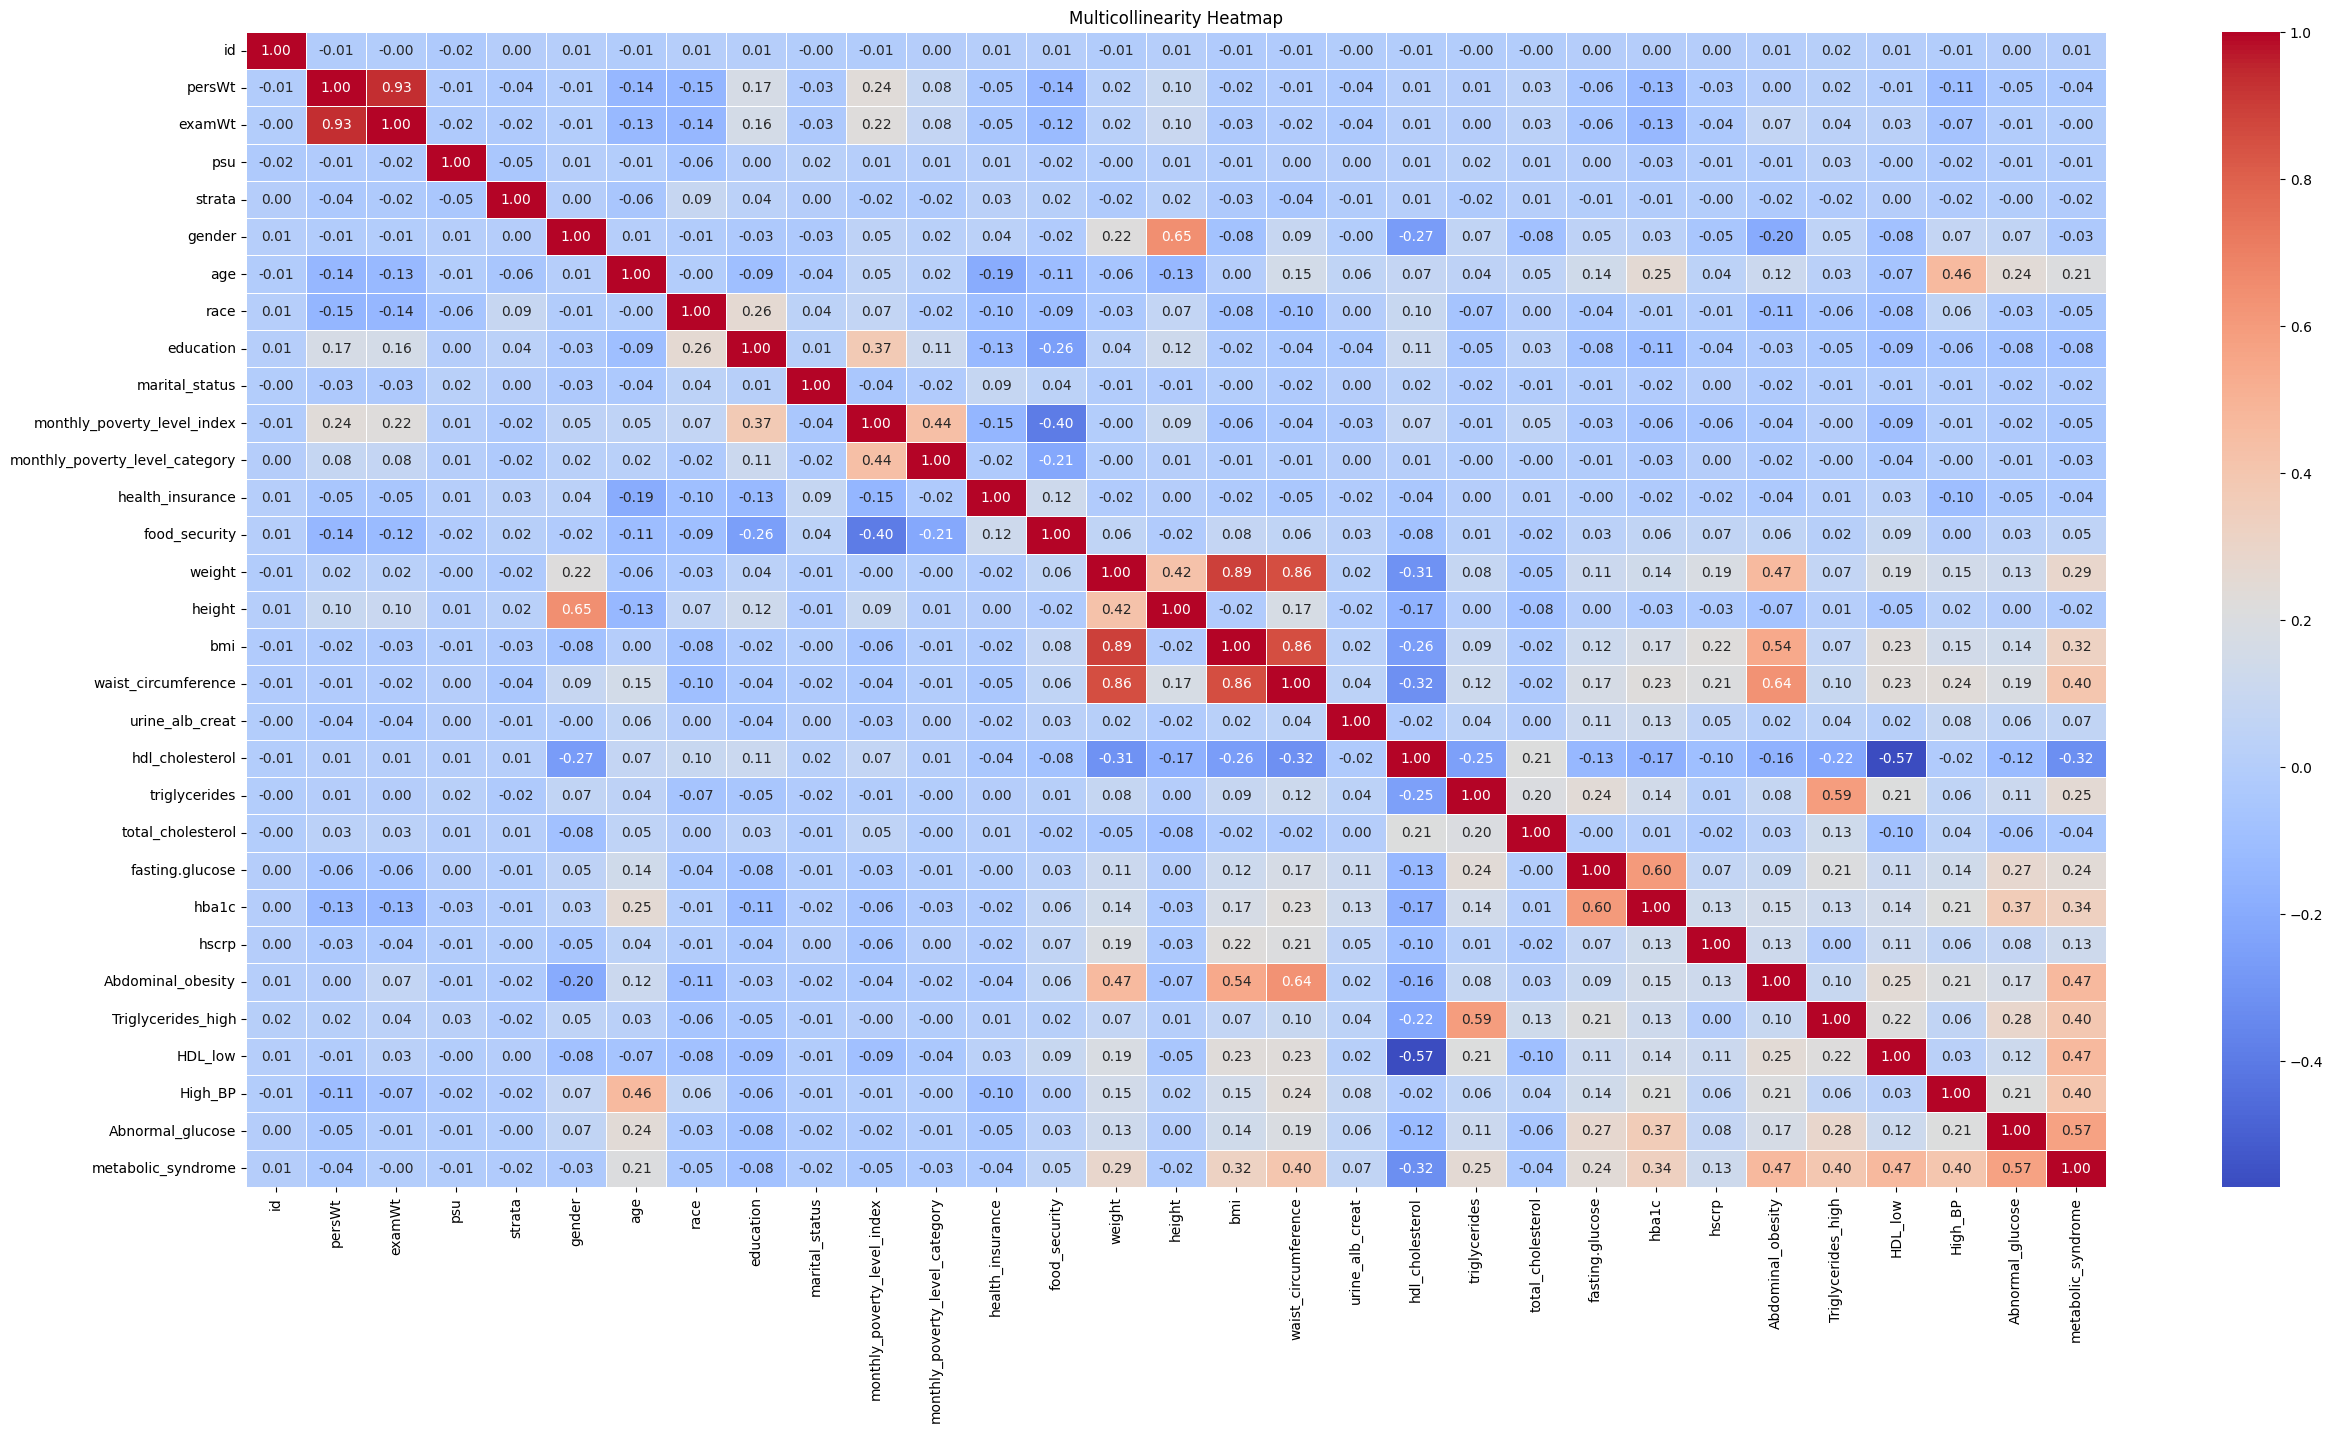

In [13]:
corr_data = data.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Multicollinearity Heatmap')
plt.show()

In [14]:
data.head()

,id,persWt,examWt,psu,strata,gender,age,race,education,marital_status,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
0,109266,7825.646112,8154.968193,2,168,0,29.0,5.0,5.0,3.0,...,195.000000,113.775145,5.200000,0.720000,1.0,0.0,0.0,0.0,0.0,0.0
1,109267,26379.991724,0.000000,1,156,0,21.0,2.0,4.0,3.0,...,185.433015,113.775145,5.868745,4.190001,0.0,0.0,0.0,0.0,0.0,0.0
2,109271,8481.589837,8658.732873,1,167,1,49.0,3.0,2.0,3.0,...,147.000000,103.000000,5.600000,28.680000,1.0,0.0,1.0,0.0,1.0,1.0
3,109273,20171.847767,22163.596850,1,155,1,36.0,3.0,4.0,3.0,...,164.000000,113.775145,5.100000,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,109274,7227.993241,7801.600218,2,167,1,68.0,5.0,4.0,3.0,...,105.000000,154.000000,5.700000,1.600000,1.0,0.0,1.0,1.0,1.0,1.0


## Remove Outliers

In [15]:
# Define a function to remove outliers based on Z-score
def remove_outliers(data, columns, threshold=3):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    df_no_outliers = data[(z_scores < threshold).all(axis=1)]
    return df_no_outliers





In [16]:
# Remove outliers for numerical data# Separate continuous and categorical variables
continuous_vars_vars = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
                   'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
                   'urine_alb_creat', 'bmi', 'height', 'weight','food_security']


# Remove rows with outliers (Z-score threshold = 3)
data = remove_outliers(data, continuous_vars)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8250.0,117046.242061,4474.568161,109266.000000,113210.250000,116998.000000,120921.750000,124822.000000
persWt,8250.0,26505.417744,30658.296800,1955.477164,9410.926306,16026.688604,30122.554093,338363.600192
examWt,8250.0,26311.250321,32828.566090,0.000000,8452.973334,15773.140202,30404.779476,367555.742979
psu,8250.0,1.538909,0.543647,1.000000,1.000000,2.000000,2.000000,3.000000
strata,8250.0,160.243394,6.952825,149.000000,154.000000,160.000000,166.000000,172.000000
gender,8250.0,0.491515,0.499958,0.000000,0.000000,0.000000,1.000000,1.000000
age,8250.0,51.017818,17.846948,20.000000,36.000000,52.000000,65.000000,80.000000
race,8250.0,3.276848,1.195502,1.000000,3.000000,3.000000,4.000000,5.000000
education,8250.0,3.568121,1.216438,1.000000,3.000000,4.000000,5.000000,9.000000
marital_status,8250.0,1.717576,2.902421,1.000000,1.000000,1.000000,2.000000,99.000000


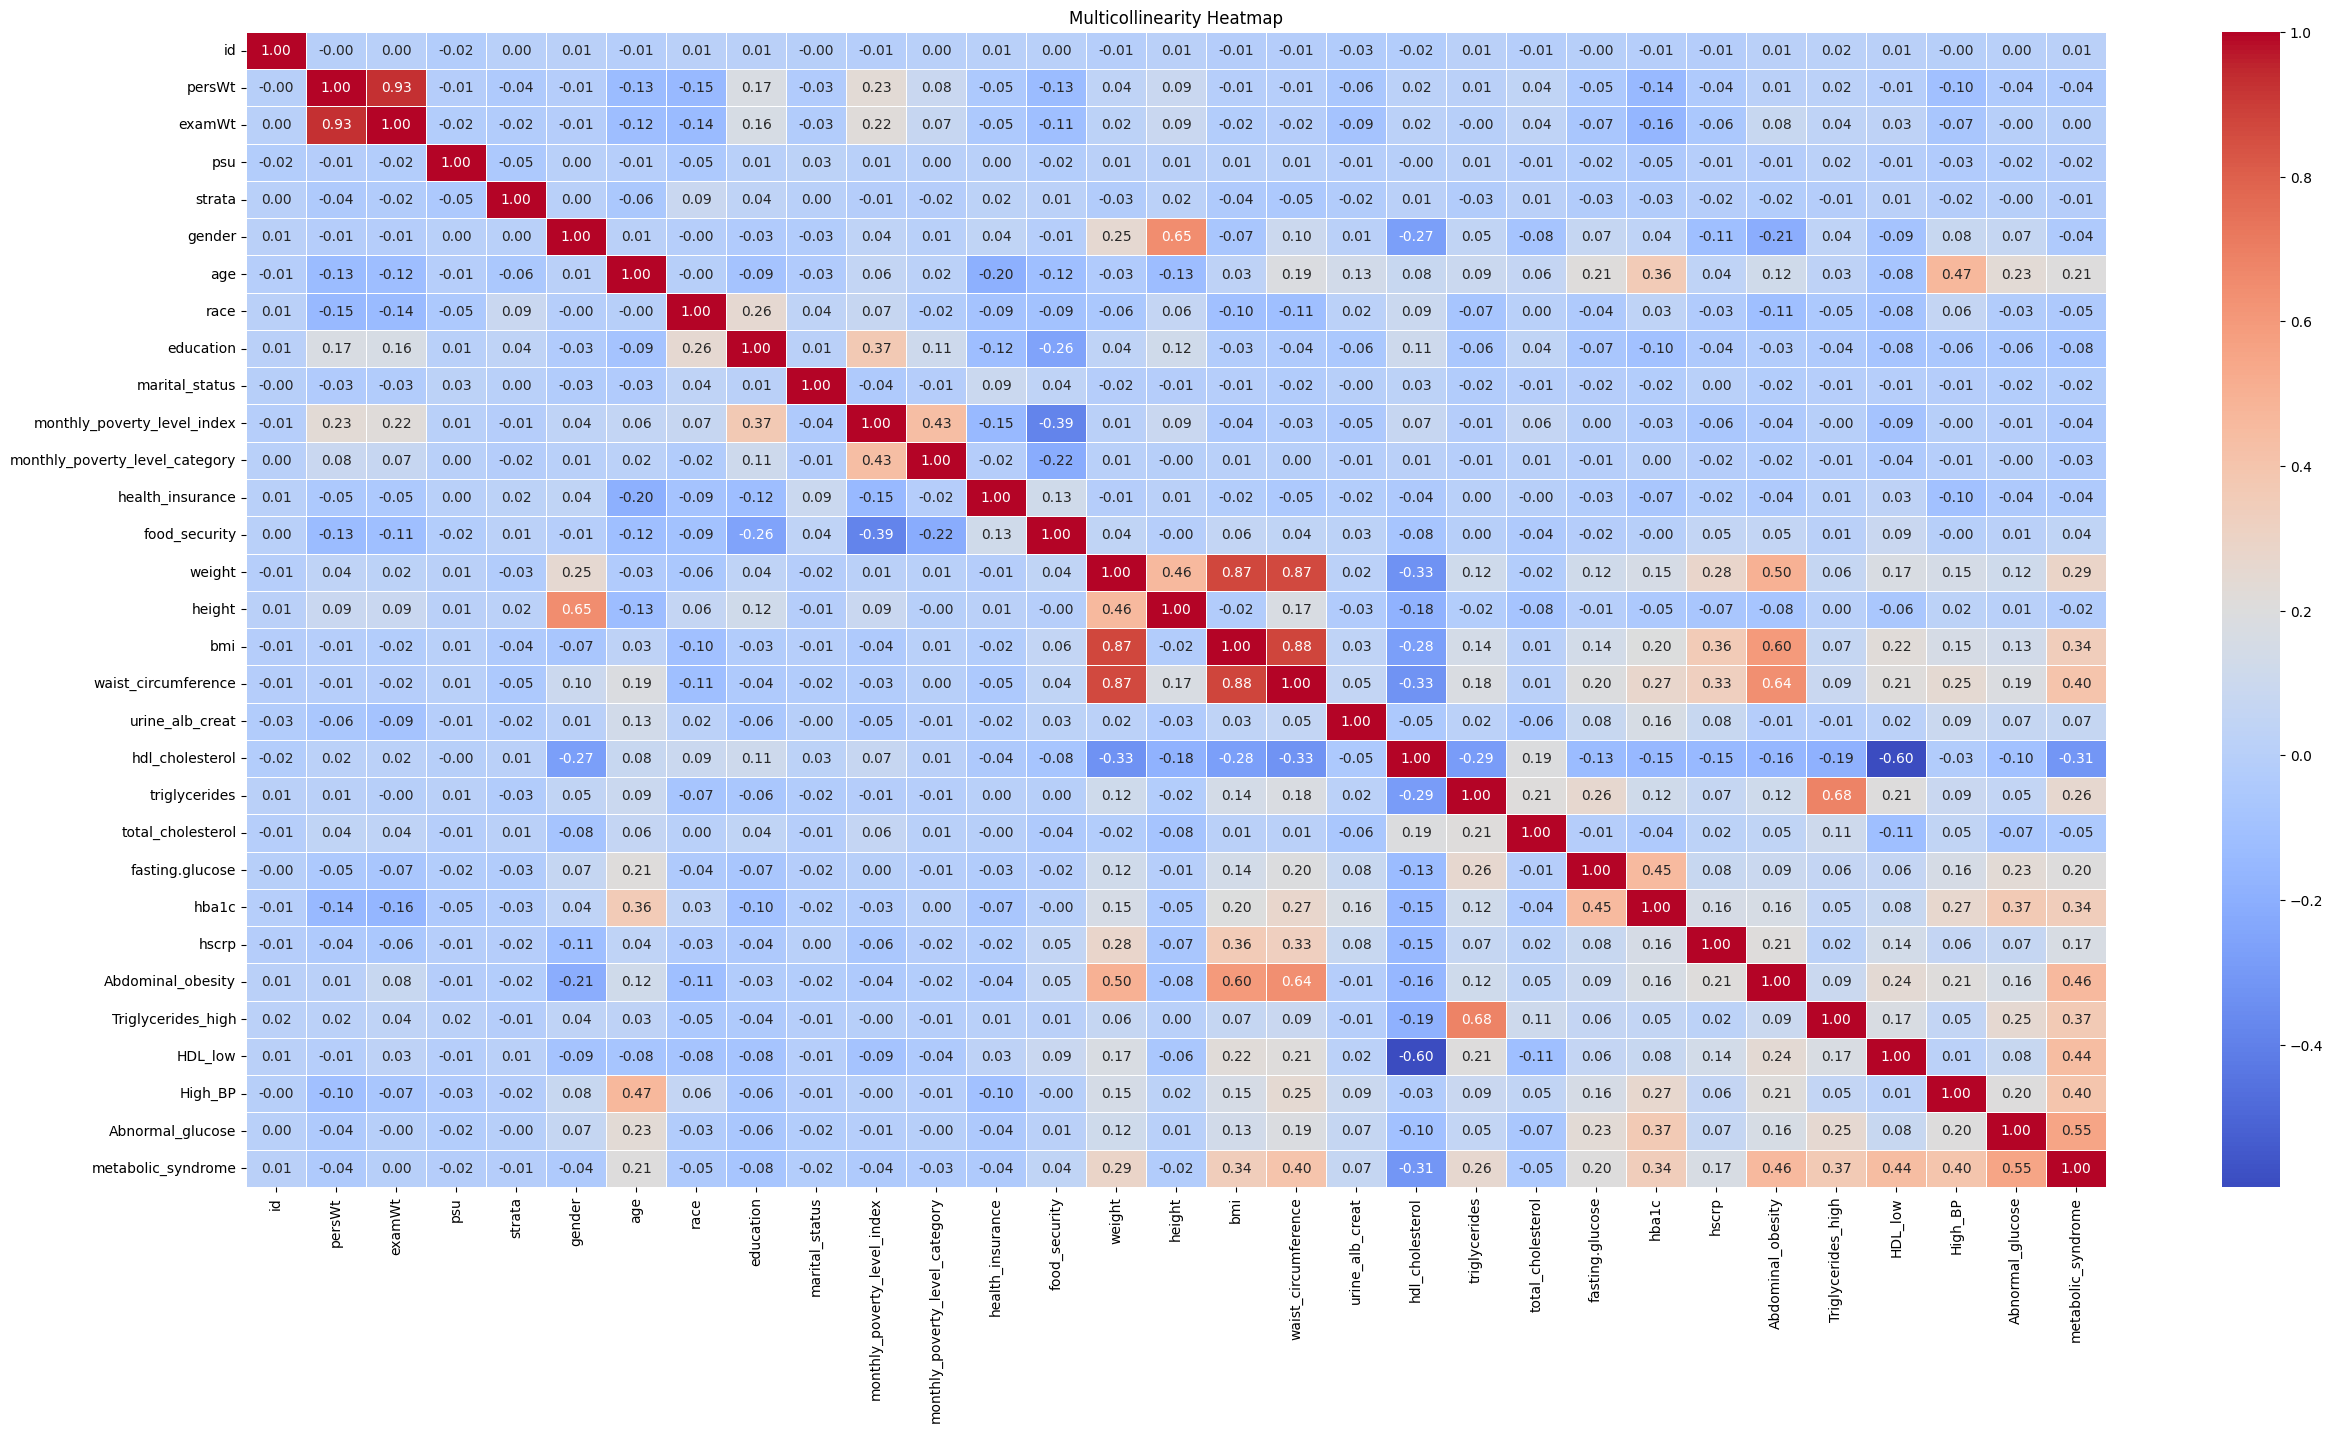

In [18]:
corr_data2 = data.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_data2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Multicollinearity Heatmap')
plt.show()

In [19]:


# Assuming 'data' is your DataFrame and 'categorical_vars' is a list of categorical variable names
for var in categorical_vars:
    data[var] = data[var].astype('category')


In [20]:
data.dtypes

id                                   int64
persWt                             float64
examWt                             float64
psu                                  int64
strata                               int64
gender                            category
age                                float64
race                              category
education                         category
marital_status                    category
monthly_poverty_level_index        float64
monthly_poverty_level_category    category
health_insurance                  category
food_security                     category
weight                             float64
height                             float64
bmi                                float64
waist_circumference                float64
urine_alb_creat                    float64
hdl_cholesterol                    float64
triglycerides                      float64
total_cholesterol                  float64
fasting.glucose                    float64
hba1c      

In [21]:
categorical_vars_dummies = ['food_security', 'monthly_poverty_level_category', 'gender','race',
                    'education','marital_status','health_insurance']

In [22]:
dummy_vars = pd.get_dummies(data[categorical_vars_dummies], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data, dummy_vars], axis=1)

# Drop the original categorical variables since they're replaced by dummy variables
data_with_dummies.drop(categorical_vars_dummies, axis=1, inplace=True)


In [23]:
data_with_dummies.head()

,id,persWt,examWt,psu,strata,age,monthly_poverty_level_index,weight,height,bmi,...,education_5.0,education_7.0,education_9.0,marital_status_2.0,marital_status_3.0,marital_status_77.0,marital_status_99.0,health_insurance_2.0,health_insurance_7.0,health_insurance_9.0
0,109266,7825.646112,8154.968193,2,168,29.0,5.00,97.100000,160.200000,37.80000,...,True,False,False,False,True,False,False,False,False,False
1,109267,26379.991724,0.000000,1,156,21.0,5.00,83.701563,166.685185,30.02686,...,False,False,False,False,True,False,False,False,False,False
3,109273,20171.847767,22163.596850,1,155,36.0,0.53,74.300000,184.200000,21.90000,...,False,False,False,False,True,False,False,False,False,False
4,109274,7227.993241,7801.600218,2,167,68.0,1.20,103.700000,185.300000,30.20000,...,False,False,False,False,True,False,False,False,False,False
5,109282,28363.015286,31816.346500,2,164,76.0,3.18,83.300000,177.100000,26.60000,...,True,False,False,False,False,False,False,False,False,False


In [24]:
data_with_dummies.dtypes

id                                       int64
persWt                                 float64
examWt                                 float64
psu                                      int64
strata                                   int64
age                                    float64
monthly_poverty_level_index            float64
weight                                 float64
height                                 float64
bmi                                    float64
waist_circumference                    float64
urine_alb_creat                        float64
hdl_cholesterol                        float64
triglycerides                          float64
total_cholesterol                      float64
fasting.glucose                        float64
hba1c                                  float64
hscrp                                  float64
Abdominal_obesity                     category
Triglycerides_high                    category
HDL_low                               category
High_BP      

In [25]:
data_with_dummies=data_with_dummies.astype(int)

In [26]:
data_with_dummies.dtypes

id                                    int32
persWt                                int32
examWt                                int32
psu                                   int32
strata                                int32
age                                   int32
monthly_poverty_level_index           int32
weight                                int32
height                                int32
bmi                                   int32
waist_circumference                   int32
urine_alb_creat                       int32
hdl_cholesterol                       int32
triglycerides                         int32
total_cholesterol                     int32
fasting.glucose                       int32
hba1c                                 int32
hscrp                                 int32
Abdominal_obesity                     int32
Triglycerides_high                    int32
HDL_low                               int32
High_BP                               int32
Abnormal_glucose                

In [27]:
df= data_with_dummies

In [28]:
df=data

In [29]:
df.head()

,id,persWt,examWt,psu,strata,gender,age,race,education,marital_status,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
0,109266,7825.646112,8154.968193,2,168,0,29.0,5.0,5.0,3.0,...,195.000000,113.775145,5.200000,0.720000,1.0,0.0,0.0,0.0,0.0,0.0
1,109267,26379.991724,0.000000,1,156,0,21.0,2.0,4.0,3.0,...,185.433015,113.775145,5.868745,4.190001,0.0,0.0,0.0,0.0,0.0,0.0
3,109273,20171.847767,22163.596850,1,155,1,36.0,3.0,4.0,3.0,...,164.000000,113.775145,5.100000,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,109274,7227.993241,7801.600218,2,167,1,68.0,5.0,4.0,3.0,...,105.000000,154.000000,5.700000,1.600000,1.0,0.0,1.0,1.0,1.0,1.0
5,109282,28363.015286,31816.346500,2,164,1,76.0,3.0,5.0,1.0,...,233.000000,95.000000,5.500000,3.110000,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
# Assuming 'data' is your original DataFrame
columns_to_drop2 = ['id', 'persWt', 'examWt', 'psu', 'strata']
df = df.drop(columns_to_drop2, axis=1)

In [31]:
df.head()

,gender,age,race,education,marital_status,monthly_poverty_level_index,monthly_poverty_level_category,health_insurance,food_security,weight,...,total_cholesterol,fasting.glucose,hba1c,hscrp,Abdominal_obesity,Triglycerides_high,HDL_low,High_BP,Abnormal_glucose,metabolic_syndrome
0,0,29.0,5.0,5.0,3.0,5.00,3.0,1.0,1.0,97.100000,...,195.000000,113.775145,5.200000,0.720000,1.0,0.0,0.0,0.0,0.0,0.0
1,0,21.0,2.0,4.0,3.0,5.00,3.0,1.0,1.0,83.701563,...,185.433015,113.775145,5.868745,4.190001,0.0,0.0,0.0,0.0,0.0,0.0
3,1,36.0,3.0,4.0,3.0,0.53,1.0,1.0,4.0,74.300000,...,164.000000,113.775145,5.100000,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,1,68.0,5.0,4.0,3.0,1.20,1.0,1.0,3.0,103.700000,...,105.000000,154.000000,5.700000,1.600000,1.0,0.0,1.0,1.0,1.0,1.0
5,1,76.0,3.0,5.0,1.0,3.18,3.0,1.0,1.0,83.300000,...,233.000000,95.000000,5.500000,3.110000,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df.dtypes

gender                            category
age                                float64
race                              category
education                         category
marital_status                    category
monthly_poverty_level_index        float64
monthly_poverty_level_category    category
health_insurance                  category
food_security                     category
weight                             float64
height                             float64
bmi                                float64
waist_circumference                float64
urine_alb_creat                    float64
hdl_cholesterol                    float64
triglycerides                      float64
total_cholesterol                  float64
fasting.glucose                    float64
hba1c                              float64
hscrp                              float64
Abdominal_obesity                 category
Triglycerides_high                category
HDL_low                           category
High_BP    

In [33]:
df.shape

(8250, 26)

# SPLIT 80/20

In [34]:
from sklearn.model_selection import train_test_split


X = df.drop('metabolic_syndrome', axis=1)  # Features
y = df['metabolic_syndrome']  # Target variable

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (6600, 25) (6600,)
Test set shape: (1650, 25) (1650,)


In [35]:
from tableone import TableOne

# Combine features and target variable
df_combined = X.copy()
df_combined['metabolic_syndrome'] = y

# Define categorical columns
categorical_cols = ['food_security', 'monthly_poverty_level_category', 'gender', 'race',
                    'education', 'marital_status', 'health_insurance', 'Abdominal_obesity',
                    'Triglycerides_high', 'HDL_low', 'High_BP', 'Abnormal_glucose']

# Define non-normal continuous columns
nonnormal_cols = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
                  'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
                  'urine_alb_creat', 'bmi', 'height', 'weight']

# Create TableOne object
table = TableOne(data=df_combined, columns=None, categorical=categorical_cols, nonnormal=nonnormal_cols, groupby='metabolic_syndrome', pval=True)

# Print summary table
print(table)


                                                 Grouped by metabolic_syndrome                                                                       
                                                                       Missing              Overall                  0.0                  1.0 P-Value
n                                                                                              8250                 6252                 1998        
gender, n (%)                               0                                0          4195 (50.8)          3114 (49.8)          1081 (54.1)   0.001
                                            1                                           4055 (49.2)          3138 (50.2)           917 (45.9)        
age, median [Q1,Q3]                                                          0     52.0 [36.0,65.0]     48.0 [33.0,63.0]     60.0 [47.0,69.0]  <0.001
race, n (%)                                 1.0                              0           937 (11.4) 

In [36]:
from tableone import TableOne
from tabulate import tabulate

# Combine features and target variable
df_combined = X.copy()
df_combined['metabolic_syndrome'] = y

# Define categorical columns
categorical_cols = ['gender',
                    'health_insurance', 'Abdominal_obesity',
                    'Triglycerides_high', 'HDL_low', 'High_BP', 'Abnormal_glucose']

# Define non-normal continuous columns
#nonnormal_cols = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
#                  'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
#                  'urine_alb_creat', 'bmi', 'height', 'weight']

# Create TableOne object
table = TableOne(data=df_combined, columns=None, categorical=categorical_cols, groupby='metabolic_syndrome', pval=True)

# Get summary table as a pandas DataFrame
summary_df = table.tableone

# Convert summary DataFrame to a fancy grid
summary_grid = tabulate(summary_df, headers='keys', tablefmt='fancy_grid')

# Print summary table
print(summary_grid)


╒═══════════════════════════════════════════════════╤════════════════════════════════════════════════╤════════════════════════════════════════════════╤════════════════════════════════════════════╤════════════════════════════════════════════╤════════════════════════════════════════════════╕
│                                                   │ ('Grouped by metabolic_syndrome', 'Missing')   │ ('Grouped by metabolic_syndrome', 'Overall')   │ ('Grouped by metabolic_syndrome', '0.0')   │ ('Grouped by metabolic_syndrome', '1.0')   │ ('Grouped by metabolic_syndrome', 'P-Value')   │
╞═══════════════════════════════════════════════════╪════════════════════════════════════════════════╪════════════════════════════════════════════════╪════════════════════════════════════════════╪════════════════════════════════════════════╪════════════════════════════════════════════════╡
│ ('n', '')                                         │                                                │ 8250                    

In [37]:
# Separate continuous and categorical variables
continuous_vars = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
                   'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
                   'urine_alb_creat', 'bmi', 'height', 'weight']

categorical_vars = ['Abdominal_obesity', 'Triglycerides_high', 'HDL_low', 'High_BP', 
                  'Abnormal_glucose', 'food_security_2.0', 'food_security_3.0', 
                  'food_security_4.0', 'monthly_poverty_level_category_2.0', 'monthly_poverty_level_category_3.0', 
                  'monthly_poverty_level_category_7.0', 'monthly_poverty_level_category_9.0', 'gender_1', 
                  'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'education_2.0', 'education_3.0', 'education_4.0', 
                  'education_5.0', 'education_7.0', 'education_9.0', 'marital_status_2.0', 'marital_status_3.0', 
                  'marital_status_77.0', 'marital_status_99.0', 'health_insurance_2.0', 'health_insurance_7.0', 
                  'health_insurance_9.0']

In [38]:
# Separate continuous and categorical variables
continuous_vars = ['age', 'triglycerides', 'fasting.glucose', 'monthly_poverty_level_index', 'hscrp',
                   'hdl_cholesterol', 'total_cholesterol', 'waist_circumference', 'hba1c',
                   'urine_alb_creat', 'bmi', 'height', 'weight']

categorical_vars = ['food_security', 'monthly_poverty_level_category', 'gender','race',
                    'education','marital_status','health_insurance','Abdominal_obesity',
                    'Triglycerides_high','HDL_low','High_BP','Abnormal_glucose']

In [39]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_vars),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_vars)
    ])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the logistic regression model
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  # Logistic regression classifier
])

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model performance ( can use classification metrics)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1242
         1.0       1.00      1.00      1.00       408

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650

Confusion Matrix:
 [[1242    0]
 [   0  408]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9951515151515151
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1242
         1.0       0.98      1.00      0.99       408

    accuracy                           1.00      1650
   macro avg       0.99      1.00      0.99      1650
weighted avg       1.00      1.00      1.00      1650

Confusion Matrix:
 [[1234    8]
 [   0  408]]


ROC AUC Score: 0.9999713854946164


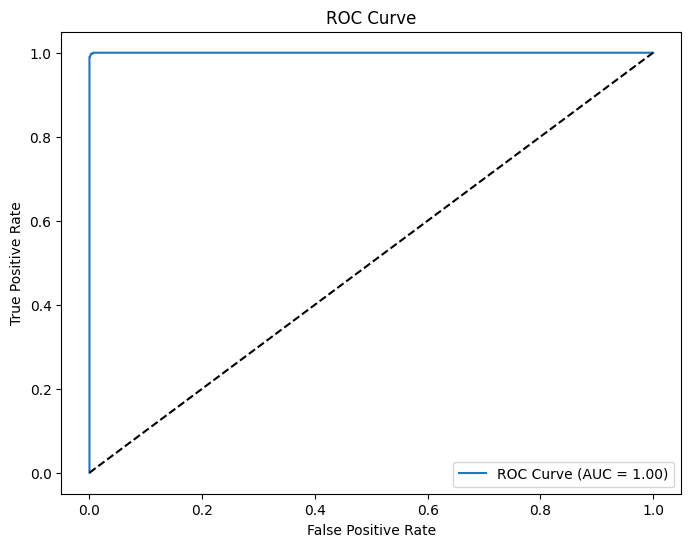

Log Loss: 0.047282649597148195


In [43]:
from sklearn.metrics import roc_auc_score, roc_curve, log_loss

# Get predicted probabilities for positive class
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate log loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)


# Feature Importance 

Abnormal_glucose: 0.2190510447512744
High_BP: 0.1320987022442868
HDL_low: 0.11498097711150936
Abdominal_obesity: 0.10508293676338405
waist_circumference: 0.0730385611133615
triglycerides: 0.06325758553859019
hdl_cholesterol: 0.048712511249982555
Triglycerides_high: 0.035560722369005905
fasting.glucose: 0.0345270466682268
hba1c: 0.034147205149329965
bmi: 0.026348366467924985
weight: 0.021248340415505163
age: 0.019476905067682383
height: 0.012391307756656166
urine_alb_creat: 0.010625046695866598
hscrp: 0.01005081018510167
gender: 0.009788766918504712
total_cholesterol: 0.009470436073056308
monthly_poverty_level_index: 0.005779864933131695
education: 0.0035038234082447224
race: 0.003447778620067293
monthly_poverty_level_category: 0.0021569588691755445
food_security: 0.0021485687464965586
marital_status: 0.0019680714645216243
health_insurance: 0.0011376614191130577


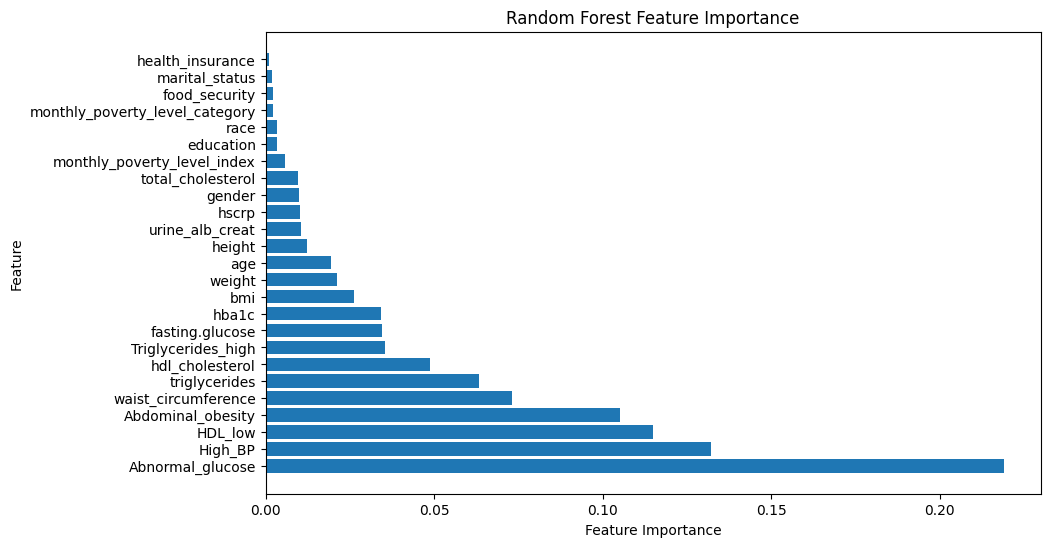

In [75]:
# Get feature importances
feature_importance = random_forest_model.feature_importances_

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

# Sort features by their importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), [importance for _, importance in sorted_features], align='center')
plt.yticks(range(len(sorted_features)), [feature for feature, _ in sorted_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# to cross check prediction VS Actual label of the data point of interest

In [91]:
index_of_interest = 100  # Index of the data point you're interested in
print ("lengh of y_test=", len(y_test))
# Check if the index is within the valid range of indices for y_test
if index_of_interest < len(y_test):
    actual_label = y_train[index_of_interest]
    predicted_label = y_pred[index_of_interest]

    # Check if the actual label matches the predicted label
    if actual_label == predicted_label:
        print("Prediction is correct!")
    else:
        print("Prediction is incorrect!")
else:
    print("Invalid index. Please choose an index within the valid range of indices for y_test.")


lengh of y_test= 1650
Prediction is correct!
